Sequential Graph


Objectives:

1. Create multiple Nodes that sequentially process and updat
different parts of the state.
2. Connect Nodes together in a graph
3. Invoke the Graph and see how the state is transformed
step-by-step.

In [1]:
from typing import TypedDict,Dict
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    name:str
    age:str
    final:str

In [2]:
def first_node(state:AgentState)-> AgentState:
    """This is the first Node of our sequence"""
    

    state["final"]= f"Hi {state['name']}"
    return state

def second_node(state:AgentState)-> AgentState:
    """This is the second Node of our sequence"""
    

    state["final"]+= f", you are {state['age']} years old."
    return state

In [3]:
graph=StateGraph(AgentState)
graph.add_node("first",first_node)
graph.add_node("second",second_node)
graph.set_entry_point("first")  
graph.add_edge("first","second")
graph.set_finish_point("second")
app=graph.compile() 
answer=app.invoke({"name":"Sher","age":"22"}) 
print(answer)


{'name': 'Sher', 'age': '22', 'final': 'Hi Sher, you are 22 years old.'}


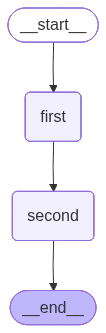

In [4]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))